Aula 2

Análise de frequência

Vamos olhar mais a fundo algumas variáveis do nosso dataframe.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.Sex[:5]

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [6]:
#tabela de frequência pra uma variável:

tbl_freq_sex = pd.DataFrame(df.Sex.value_counts())
tbl_freq_sex.rename(columns = {'Sex': 'freq_abs_sex'}, inplace = True)
tbl_freq_sex['freq_relativa_sex'] = round(tbl_freq_sex.freq_abs_sex /tbl_freq_sex.freq_abs_sex.sum(),2)

In [7]:
tbl_freq_sex

,freq_abs_sex,freq_relativa_sex
male,577,0.65
female,314,0.35


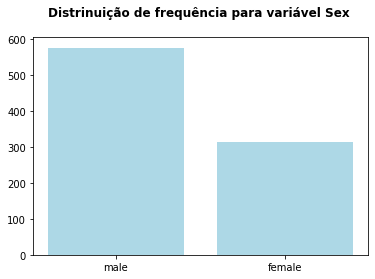

In [8]:
#Podemos ver isso graficamente também com um gráfico de barras

plt.bar(df.Sex.unique(), df.Sex.value_counts(), color = 'lightblue')
plt.title('Distrinuição de frequência para variável Sex \n', {'fontsize': 12, 'fontweight': 'bold'})
plt.show()

Qual a probabilidade de sobreviver dado que é um homem? E dado que é mulher?


P(A\B)=P(A&B)
       P(B)

In [9]:
#probabilidade de sobreviver geral

round(df.Survived.value_counts()/df.Survived.shape[0],2)

0    0.62
1    0.38
Name: Survived, dtype: float64

In [12]:
#A: Sobreviver
#B: Ser homem/mulher

prob_h = df[(df.Survived==1) & ( df.Sex =='male')].shape[0] / df[df.Sex=='male'].shape[0]
prob_m = df[(df.Survived==1) & ( df.Sex =='female')].shape[0] / df[df.Sex=='female'].shape[0]

print("Probabilidade de sobreviver sendo homem: ", round(prob_h, 2))
print("Probabilidade de sobreviver sendo mulher: ", round(prob_m, 2))

Probabilidade de sobreviver sendo homem:  0.19
Probabilidade de sobreviver sendo mulher:  0.74


Frequência de variável Fare

In [13]:
#Podemos ver aqui que temos fare == 0

df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
#Vamos investigar quem são os passageiros que aparentemente não pagaram nada pela viagem.

df[df.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


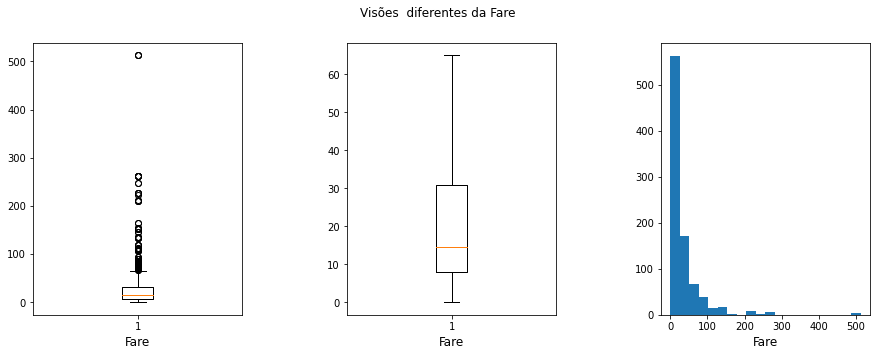

In [15]:
#Vários gráficos numa mesma imagem:

fig = plt.figure(figsize=(15,5)) #Tamanho do frame
plt.subplots_adjust(wspace= 0.5) #Espaço entre os gráficos
plt.suptitle('Visões  diferentes da Fare') #Titulo da visão geral (não é o titulo de cada gráfico)
plt.subplot(1,3,1) # posição do primeiro gráfico (1 linha, 3 colunas, posição 1)
plt.boxplot(df.Fare, meanline = True)
plt.xlabel('Fare', {'fontsize': 12}) #legenda no eixo x
plt.subplot(1,3,2)
plt.boxplot(df.Fare, showfliers=False)
plt.xlabel('Fare', {'fontsize': 12})
plt.subplot(1,3,3)
plt.hist(df.Fare, bins = 20)
plt.xlabel('Fare', {'fontsize': 12})
plt.show()

Análise de Fare com a Age

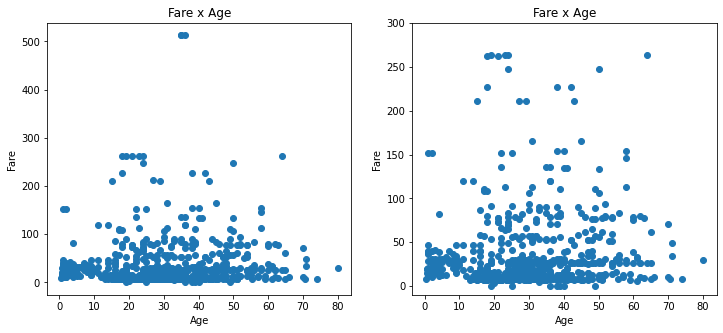

In [17]:
plt.figure(figsize=[12,5])
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
plt.title("Fare x Age")
plt.scatter(df.Age, df.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.subplot(1,2,2)
plt.title("Fare x Age")
plt.scatter(df.Age, df.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.ylim([-10,300])
plt.show()

#poderiamos filtrar só onde a Fareé diferente de 0 e ver a correlação com ficaria! Testem por aí.

In [18]:
#df.corr() calcula a correlação te todas com todas as variavéis do df, cujo tipo é numérico.
#Aqui estamos selecionando apenas a coluna fare.

df.corr()[['Fare']]

,Fare
PassengerId,0.012658
Survived,0.257307
Pclass,-0.549500
Age,0.096067
SibSp,0.159651
Parch,0.216225
Fare,1.000000


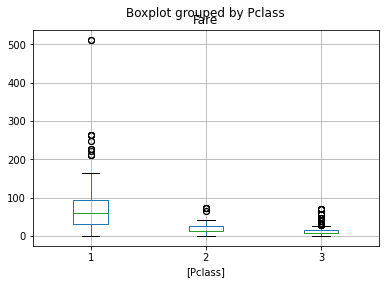

In [19]:
#Variavel Pclass assume 3 valores sendo que 1 é o melhor tipo de classe de passagem e 3 é o pior.

df.boxplot('Fare', by = ['Pclass'])
plt.show()

Pclass, Fare e Cabin

In [21]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
#extraindo apenas a letra da variavel cabine
letra_cabine = [i[0] for i in df.Cabin.unique()[1:]]

print(np.unique(letra_cabine))

#Adicionando essa coluna no df

df['Cabin_letter'] = [i[0] for i in df.Cabin.astype(str)]

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']


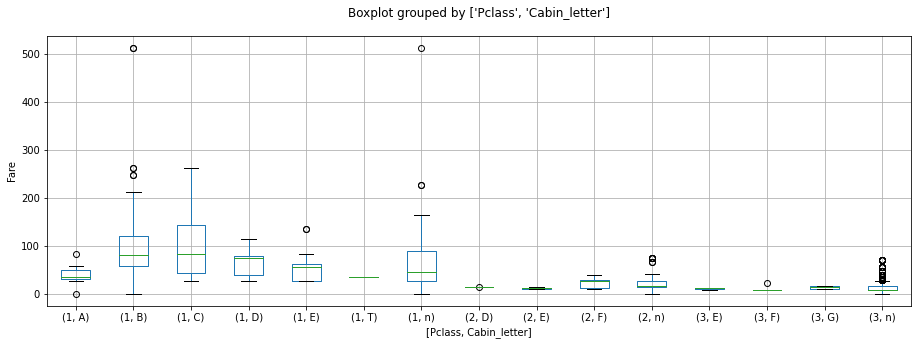

In [23]:
df.boxplot('Fare', by = ['Pclass', 'Cabin_letter'], figsize= [15,5])
plt.ylabel('Fare')
plt.title('')
plt.show()